In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.000,147.042,85.854,0.700,74.375,149.750,218.825,296.400
radio,200.000,23.264,14.847,0.000,9.975,22.900,36.525,49.600
newspaper,200.000,30.554,21.779,0.300,12.750,25.750,45.100,114.000
sales,200.000,14.023,5.217,1.600,10.375,12.900,17.400,27.000


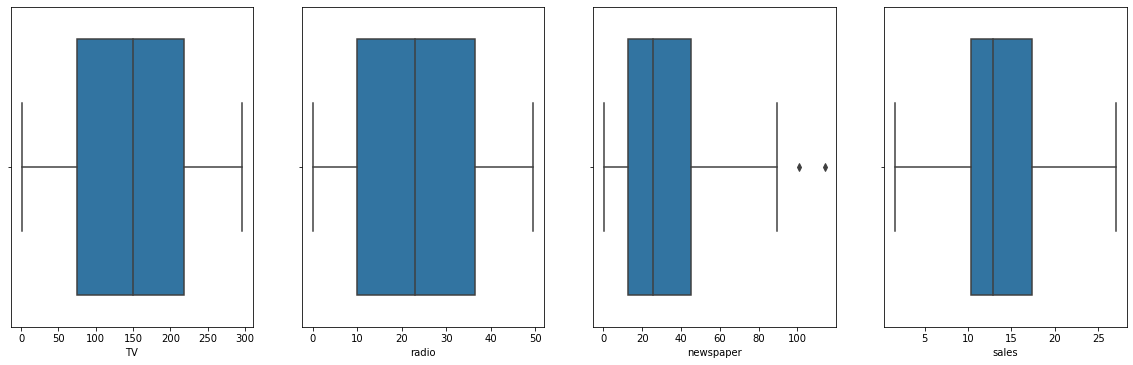

In [4]:
index = 0
plt.figure(figsize=(20,20))
for i in df.columns:
    index += 1
    plt.subplot(3,4,index)
    sns.boxplot(df[i])

In [5]:
multi = df.corr()
multi[(multi != 1) & (multi > 0.7)]

,TV,radio,newspaper,sales
TV,NaN,NaN,NaN,0.782
radio,NaN,NaN,NaN,NaN
newspaper,NaN,NaN,NaN,NaN
sales,0.782,NaN,NaN,NaN


### Test Train Modelleme :

In [6]:
X = df.drop("sales", axis=1) # future
y = df["sales"] # target

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Metrics : 

In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

### Ridge : 

In [9]:
from sklearn.linear_model import Ridge

In [10]:
alpha_space = np.linspace(0.01, 1, 100)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

operations = [("scaler", StandardScaler()), ("ridge", Ridge(alpha= alpha_space))]
Pipeline(steps=operations)
pipe_model = Pipeline(steps=operations)

param_grid = {'ridge__alpha':alpha_space}
pipe_model = Pipeline(steps=operations)
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'r2')
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        Ridge(alpha=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92

In [12]:
pipe_grid.best_params_

{'ridge__alpha': 1.0}

In [13]:
ridge_score = train_val(pipe_grid, X_train, y_train, X_test, y_test)
ridge_score

,train,test
R2,0.897,0.894
mae,1.216,1.400
mse,2.769,2.880
rmse,1.664,1.697


### Lasso : 

In [14]:
from sklearn.linear_model import Lasso

In [15]:
operations = [("scaler", StandardScaler()), ("lasso", Lasso(alpha= alpha_space))]
Pipeline(steps=operations)
pipe_model = Pipeline(steps=operations)

param_grid = {'lasso__alpha': alpha_space}
pipe_model = Pipeline(steps=operations)
pipe_grid_ls = GridSearchCV(pipe_model, param_grid, cv=10, scoring= 'r2')
pipe_grid_ls.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso',
                                        Lasso(alpha=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51...
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92

In [17]:
lasso_score = train_val(pipe_grid_ls, X_train, y_train, X_test, y_test)
lasso_score

,train,test
R2,0.895,0.895
mae,1.225,1.374
mse,2.808,2.843
rmse,1.676,1.686


### Random Forest : 

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model = RandomForestRegressor()

param_grid = {"n_estimators" : [None, 64, 128],
              "criterion" : ["mse", "rmse", "r2"],
              "max_features" : ["auto", "log2"],
              "max_depth": [None, 2, 3, 4, 5,6, 7]
              
             }

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          n_jobs = -1)

grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'rmse', 'r2'],
                         'max_depth': [None, 2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [None, 64, 128]},
             scoring='r2')

In [22]:
grid_model.best_params_

{'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 128}

In [23]:
random_score = train_val(grid_model, X_train, y_train, X_test, y_test)
random_score

,train,test
R2,0.996,0.981
mae,0.227,0.571
mse,0.102,0.522
rmse,0.319,0.722


### SVM ile tahmin : 

In [24]:
from sklearn.svm import SVR

In [25]:
operations = [('scaler',StandardScaler()),('svr',SVR())]
pipe_svr = Pipeline(operations)

param_grid = {'svr__C': np.linspace(0,10,100),
              'svr__gamma': ["scale", "auto", np.linspace(0,10,98)],
              'svr__kernel': ['rbf', 'linear']}

svr_model_grid = GridSearchCV(pipe_svr, param_grid, scoring="r2", cv=6)

svr_model_grid.fit(X_train, y_train)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22...
        6.70103093,  6.80412371,  6.90721649,  7.01030928,  7.11340206,
        7.21649485,  7.31958763,  7.42268041,  7.5257732 ,  7.62886598,
        7.73195876,  7.83505155,  7.93814433,  8.04123711,  8.1443299 ,
        8.24742268,  8.35051546,  8.45360825,  8.55670103,  8.65979381,
        8.7628866 ,  8.86597938,  8.96907216,  9.07216495,  9.17525773,
        9.27835052,  9.3814433 ,  9.48453608,  9.58762887,  9.69072165,
        9.79381443,  9.89690722, 10.        ])],
         

In [26]:
svr_model_grid.best_params_

{'svr__C': 10.0, 'svr__gamma': 'auto', 'svr__kernel': 'rbf'}

In [27]:
svr_score = train_val(svr_model_grid, X_train, y_train, X_test, y_test)
svr_score

,train,test
R2,0.985,0.975
mae,0.295,0.565
mse,0.411,0.678
rmse,0.641,0.824


In [30]:
ridge_score.columns = ["ridge_train", "ridge_test"]
lasso_score.columns = ["lasso_train", "lasso_test"]
random_score.columns = ["random_train", "random_test"]
svr_score.columns = ["svr_train", "svr_test"]

scores = pd.concat([ridge_score, lasso_score, random_score, svr_score], axis=1)
scores

,ridge_train,ridge_test,lasso_train,lasso_test,random_train,random_test,svr_train,svr_test
R2,0.897,0.894,0.895,0.895,0.996,0.981,0.985,0.975
mae,1.216,1.400,1.225,1.374,0.227,0.571,0.295,0.565
mse,2.769,2.880,2.808,2.843,0.102,0.522,0.411,0.678
rmse,1.664,1.697,1.676,1.686,0.319,0.722,0.641,0.824
